<a href="https://colab.research.google.com/github/SureshRajJoshi/MakeCoffee/blob/main/Heart_Disease_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("New Year 2081! Wish You a Very blessful and Fruitfull Year")

New Year 2081! Wish You a Very blessful and Fruitfull Year


In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
cardio_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI-Udemy/Bonus Projects/Exploratory Data Analysis/cardio_train.csv", sep=";")
#/content/drive/My Drive/Colab Notebooks/Modern AI Portfolio Builder/Bonus /cardio_train.csv", sep=";"

In [ ]:
cardio_df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.

Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [ ]:
# 1.Drop ID (No need)
cardio_df = cardio_df.drop(columns='id')

In [ ]:
# 2.Age into year from days
cardio_df['age'] = cardio_df['age']/365

In [ ]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:

# Data analysis
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [ ]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.339358,6.759594,29.583562,48.394521,53.980822,58.430137,64.967123
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
cardio_df['cardio'].unique()

array([0, 1])

In [ ]:
# Checking null data
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
# getting correlation matrix
corr_matrix = cardio_df.corr()
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


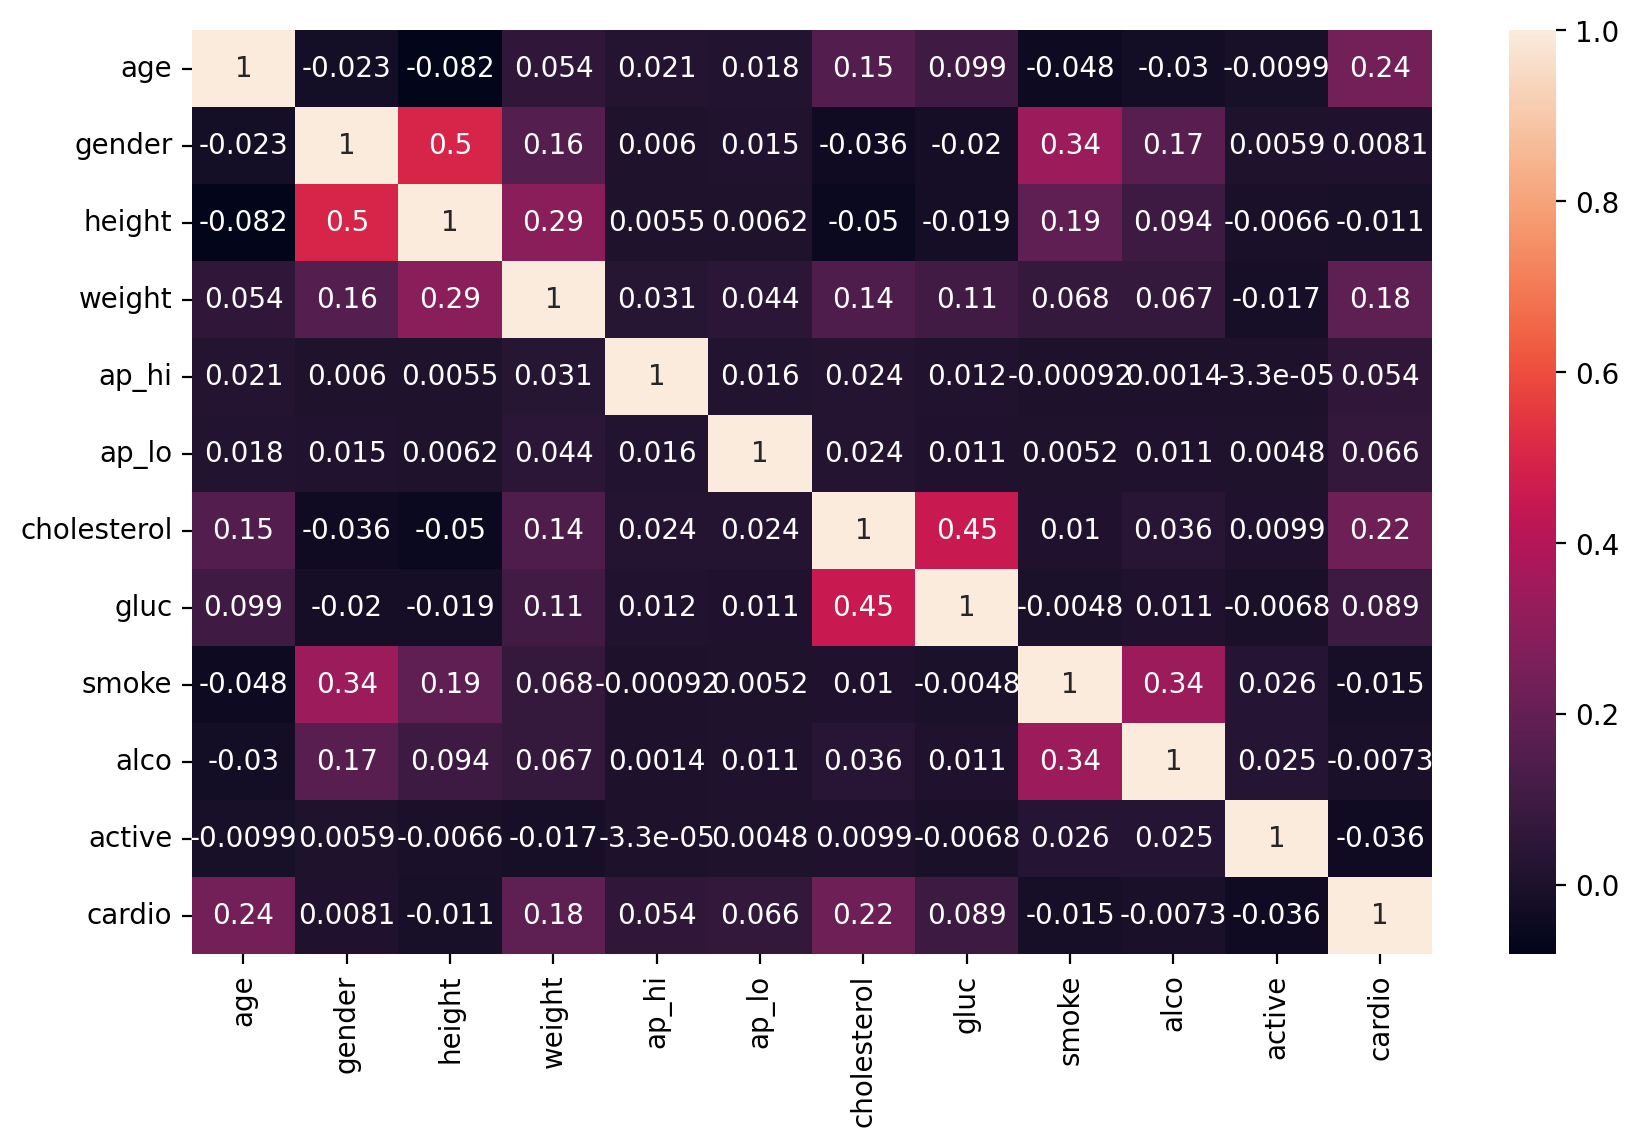

In [ ]:
# Displaying corr-matrix as heatmap
plt.figure(figsize=(10,6), dpi=200)
sns.heatmap(corr_matrix, annot = True)
plt.show()

Text(0.5, 1.0, 'Count of each Target Class')

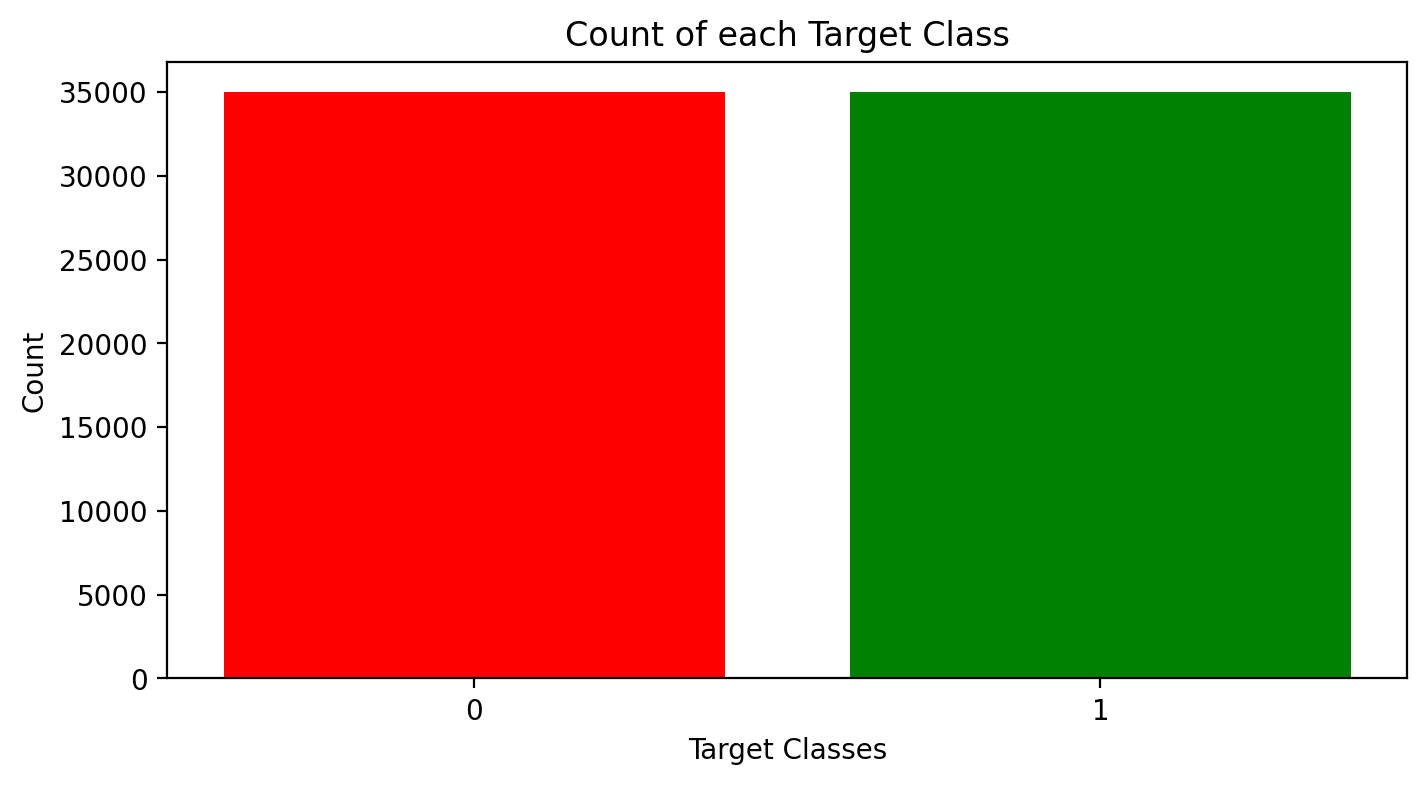

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
plt.bar(cardio_df['cardio'].unique(), cardio_df['cardio'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [ ]:
cardio_df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

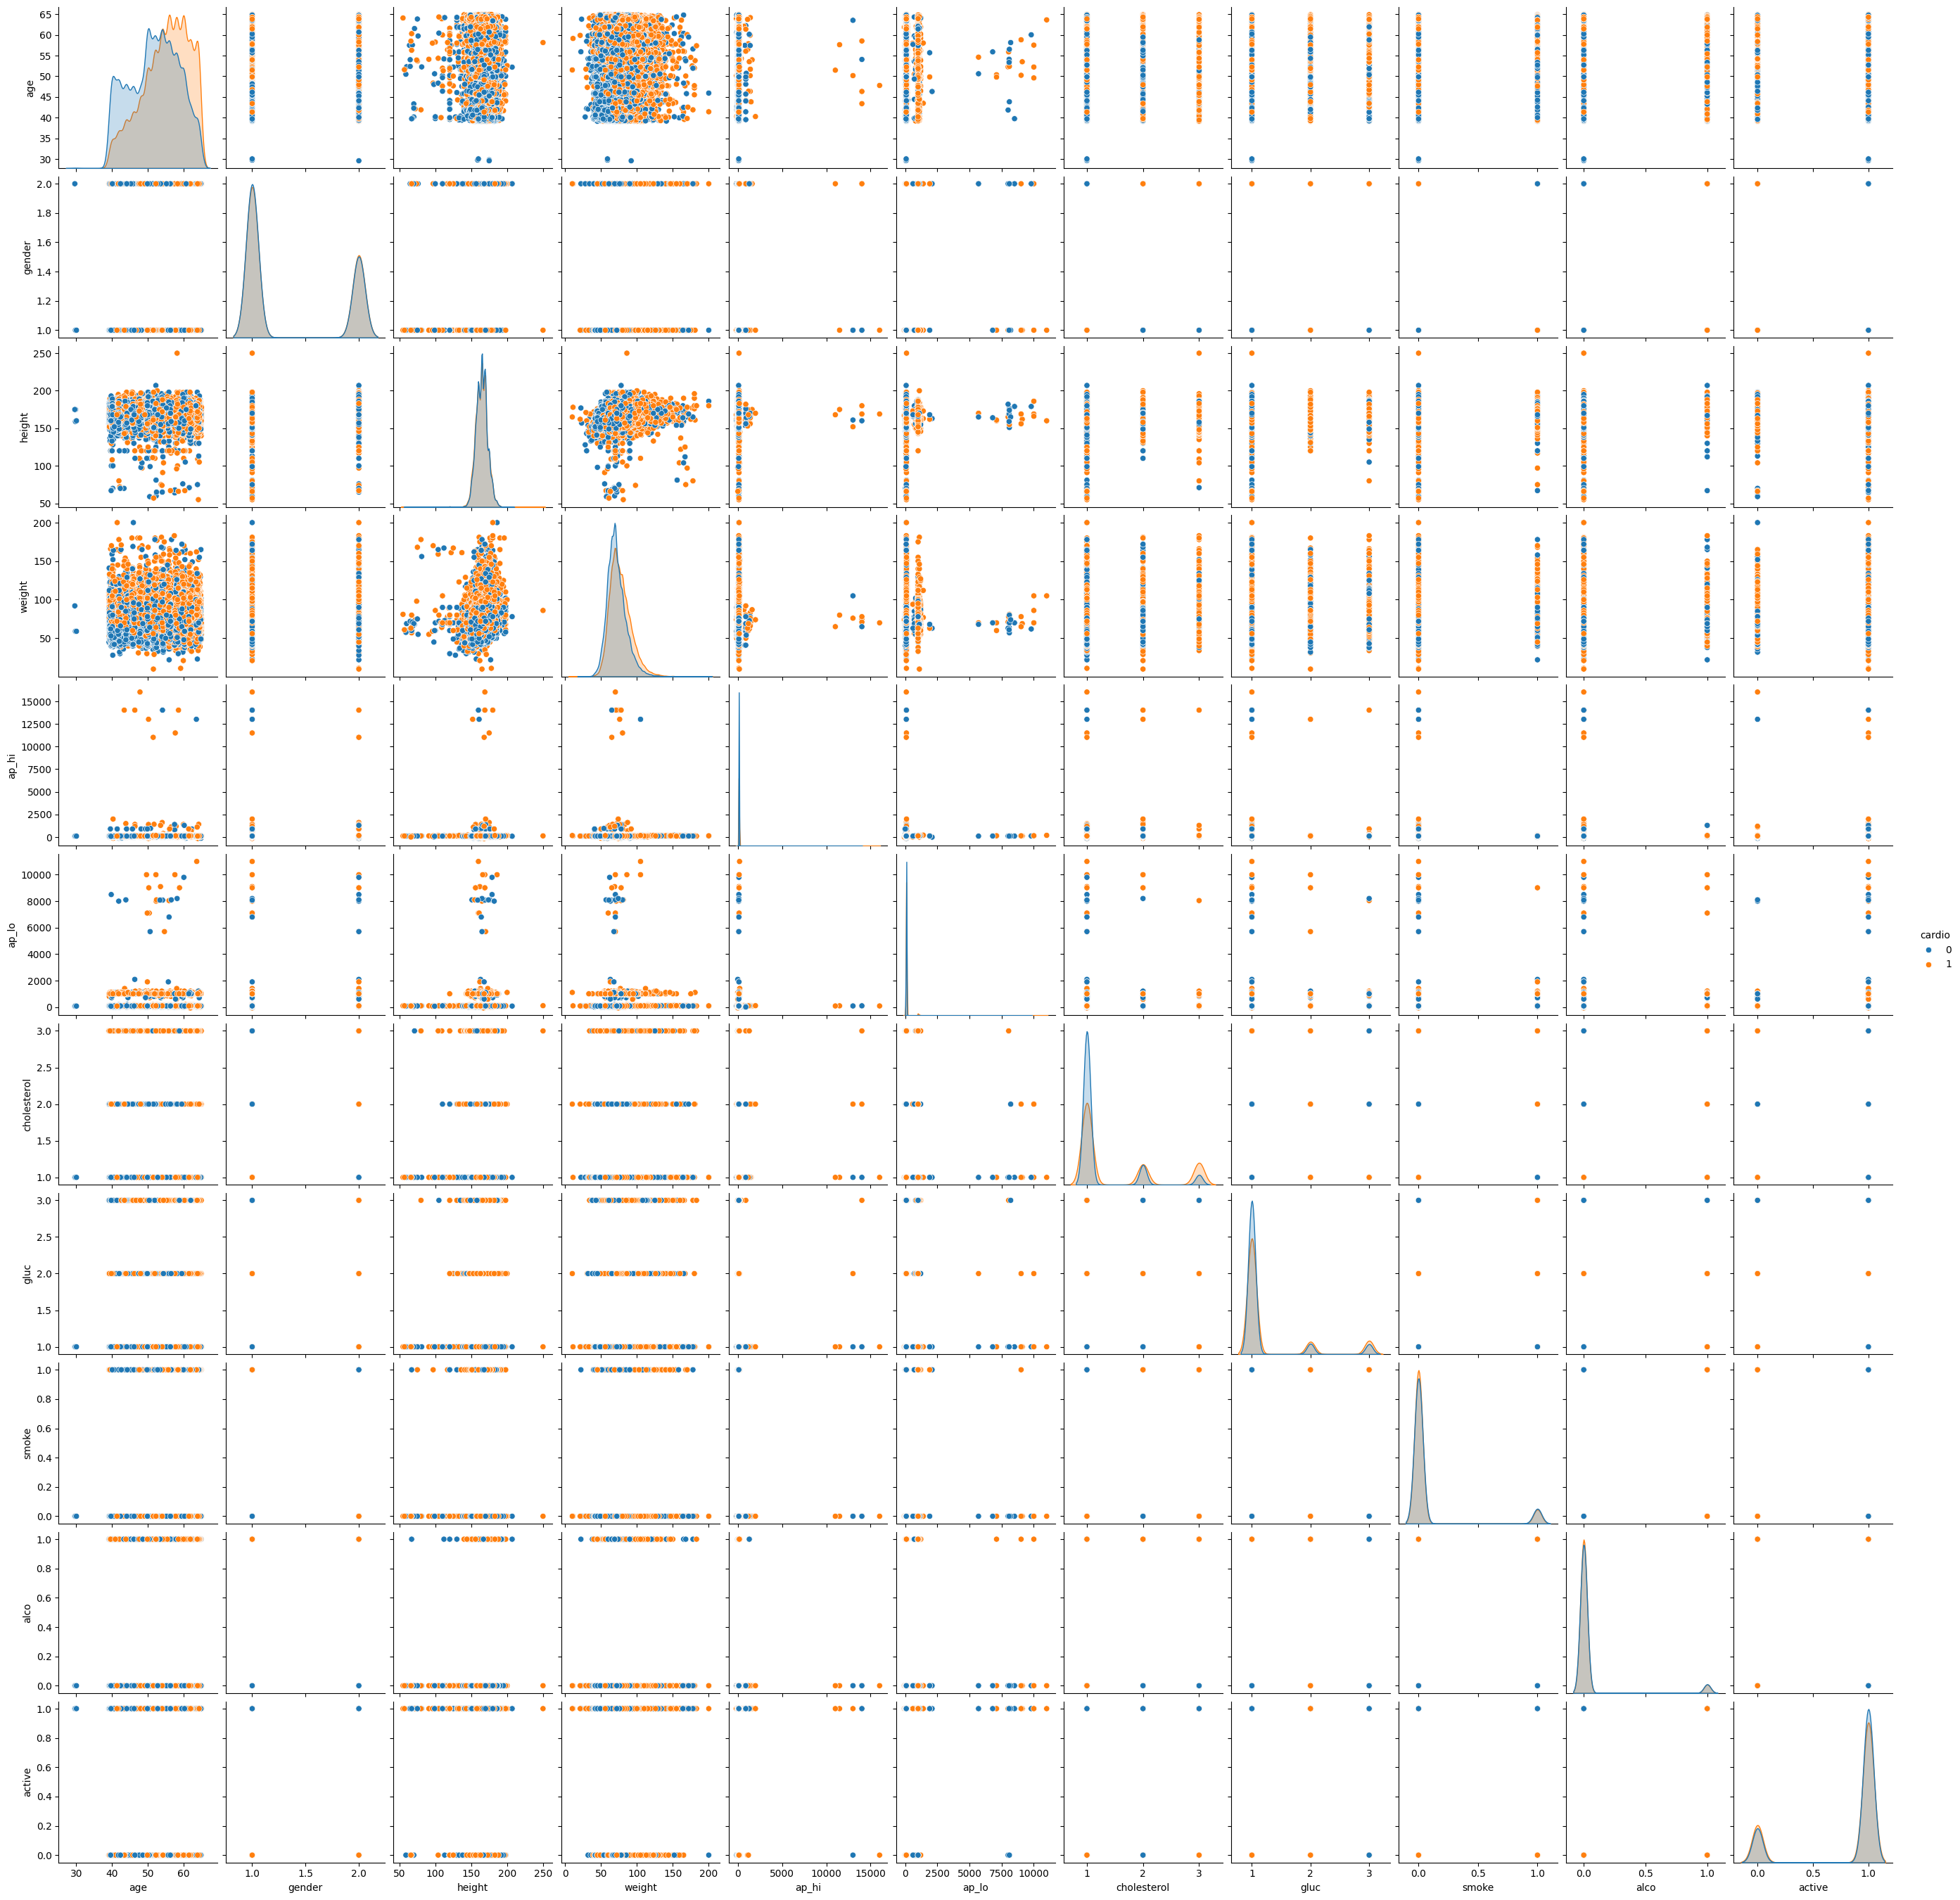

In [ ]:
# pair plot - Presence or absence of cardiovascular disease- HUE
sns.pairplot(cardio_df, hue='cardio')

# Model - Building and Training AI Neural Network

In [ ]:
cardio_df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# x= features   y=targets
X = cardio_df.drop(columns=['cardio'])
y = cardio_df['cardio']

In [ ]:
# Feature Scalling of Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X.shape

(70000, 11)

In [ ]:
y.shape

(70000,)

# Splitting datas
Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.25)

In [ ]:
X_train.shape

(52500, 11)

In [ ]:
X_test.shape

(17500, 11)

In [ ]:
y_test.shape

(17500,)

Classifiers using Sequential Models

In [ ]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=300, activation='relu', input_shape=(11,)))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=300, activation='relu'))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               3600      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               120400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 244,601
Trainable params: 244,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs_list = classifier.fit(X_train, y_train, epochs = 30)

Epoch 1/30
1641/1641 [==============================] - 16s 8ms/step - loss: 0.5832 - accuracy: 0.7092
Epoch 2/30
1641/1641 [==============================] - 15s 9ms/step - loss: 0.5546 - accuracy: 0.7267
Epoch 3/30
1641/1641 [==============================] - 15s 9ms/step - loss: 0.5550 - accuracy: 0.7307
Epoch 4/30
1641/1641 [==============================] - 14s 9ms/step - loss: 0.5497 - accuracy: 0.7313
Epoch 5/30
1641/1641 [==============================] - 14s 8ms/step - loss: 0.5476 - accuracy: 0.7318
Epoch 6/30
1641/1641 [==============================] - 14s 8ms/step - loss: 0.5456 - accuracy: 0.7317
Epoch 7/30
1641/1641 [==============================] - 14s 9ms/step - loss: 0.5449 - accuracy: 0.7326
Epoch 8/30
1641/1641 [==============================] - 14s 9ms/step - loss: 0.5452 - accuracy: 0.7328
Epoch 9/30
1641/1641 [==============================] - 14s 9ms/step - loss: 0.5440 - accuracy: 0.7337
Epoch 10/30
1641/1641 [==============================] - 14s 8ms/step - l

In [ ]:
y_pred = classifier.predict(X_test)

547/547 [==============================] - 2s 4ms/step


In [ ]:
y_pred

array([[0.79219574],
       [0.5567553 ],
       [0.8178899 ],
       ...,
       [0.10345969],
       [0.72049767],
       [0.79574955]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

## Evaluate the ARTIFICIAL NETWORK MODEL

In [ ]:
epochs_list.history.keys()

dict_keys(['loss', 'accuracy'])

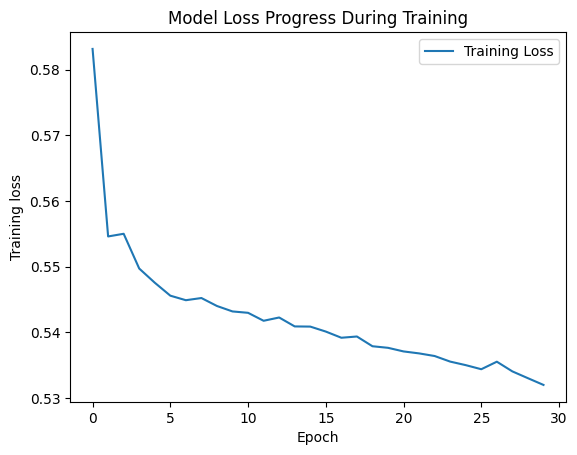

In [ ]:
plt.plot(epochs_list.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training Loss'])


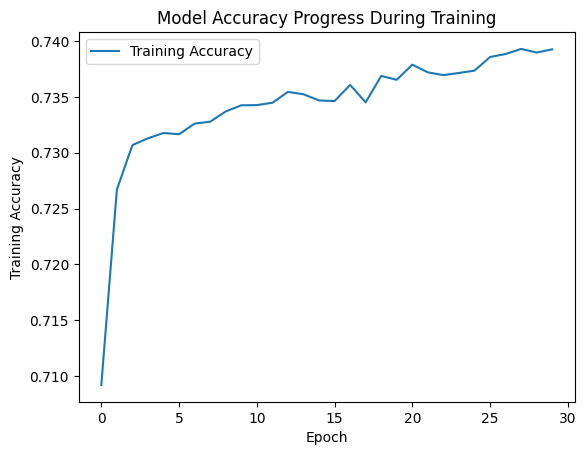

In [ ]:
plt.plot(epochs_list.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

Here, the model improve it's accuracy from 71% to 74% on training data.

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      8814
           1       0.76      0.68      0.72      8686

    accuracy                           0.73     17500
   macro avg       0.74      0.73      0.73     17500
weighted avg       0.74      0.73      0.73     17500



<Axes: >

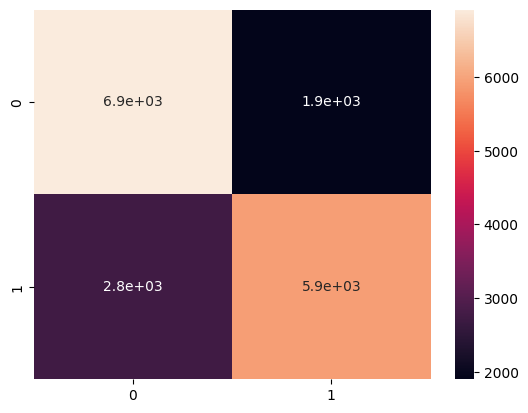

In [ ]:
# Testing Set Perfomance
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True)

## Build and train X-GBOOST classifier model

In [ ]:
from xgboost import XGBClassifier
# model= XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier()
# There are 40+ hyper parameter in XGBClassifiers

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predict= model.predict(X_test)

In [ ]:
predict

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      8814
           1       0.75      0.70      0.72      8686

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



<Axes: >

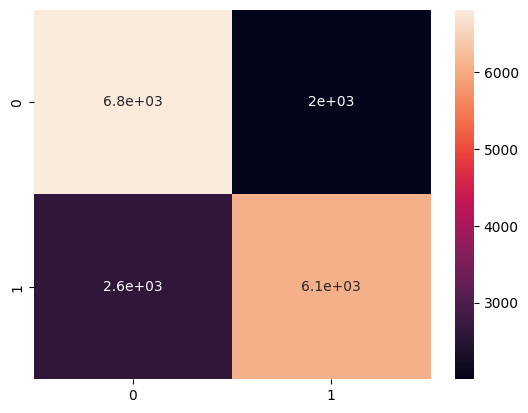

In [ ]:
# plot in heat map
sns.heatmap(confusion_matrix(y_test, predict), annot=True)